In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("articles.B2M.csv")
data = pd.read_csv("authors.B2M.csv")
data = pd.read_csv("paper_counts.csv")

In [20]:
authors = pd.read_csv("authors.B2M.csv")
display(authors.head())

'authors.B2M.csv'

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10575721,1,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10575721,2,P,Calas,P,NaN
2,10575721,3,A,Mouttet,A,NaN
3,10617805,1,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
4,10617805,2,I,Serre,I,NaN


In [21]:
authors["AuthorName"] = authors["AuthorLastname"] + ", " + authors["AuthorInitials"]

In [22]:
author_counts = (
    authors.groupby("AuthorName")["PMID"]
    .nunique()
    .reset_index()
)
author_counts.columns = ["AuthorName", "PaperCount"]
author_counts = author_counts.sort_values(
    by="PaperCount",
    ascending=False
)
top_authors = author_counts.head(10)
top_authors

,AuthorName,PaperCount
4319,"Wang, Y",17
4314,"Wang, X",14
2377,"Li, Y",13
4294,"Wang, J",11
4666,"Zhang, H",11
4683,"Zhang, Y",11
4303,"Wang, Q",9
4321,"Wang, Z",9
2460,"Liu, Y",9
2458,"Liu, X",9


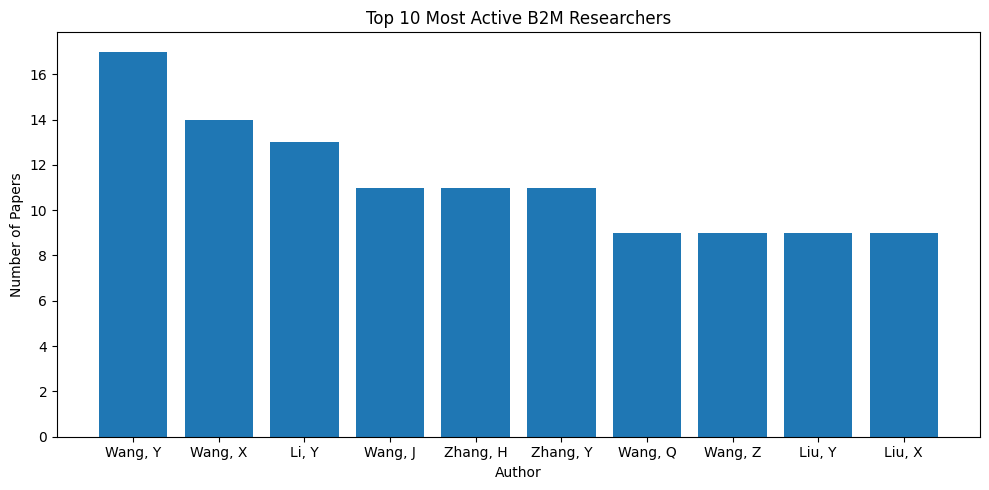

In [26]:
top_authors = author_counts.head(10)
plt.figure(figsize=(10, 5))
plt.bar(
    top_authors["AuthorName"],
    top_authors["PaperCount"]
)

plt.xlabel("Author")
plt.ylabel("Number of Papers")
plt.title("Top 10 Most Active B2M Researchers")
plt.tight_layout()
plt.show()